In [3]:
import os
import tarfile
import urllib
import pandas as pd

DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/PEDAPATI-SAIVAMSI/END_TO_END_ML_PROJECT_HEART-DISESEAASE_PREDICTION/main/heart/heart.csv'
HEART_PATH = os.path.join("datasets","heart")
HEART_URL = DOWNLOAD_ROOT + "datasets/heart/heart.csv"

def fetch_heart_data(heart_url=HEART_URL, heart_path=HEART_PATH):
    os.makedirs(heart_path,exist_ok=True)
    csv_path=os.path.join(heart_path,"heart.csv")
    urllib.request.urlretrieve(heart_url,csv_path)
def load_heart_data(heart_path=HEART_PATH):
    csv_path=os.path.join(heart_path,"heart.csv")
    print(f"Loading data from: {csv_path}")
    return pd.read_csv(csv_path)


In [4]:
data=load_heart_data()
data.head()
    

Loading data from: datasets\heart\heart.csv


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
print(data["Sex"].value_counts())
print(data["ChestPainType"].value_counts())
print(data["RestingECG"].value_counts())
print(data["ExerciseAngina"].value_counts())
print(data["ST_Slope"].value_counts())

Sex
M    725
F    193
Name: count, dtype: int64
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


In [9]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


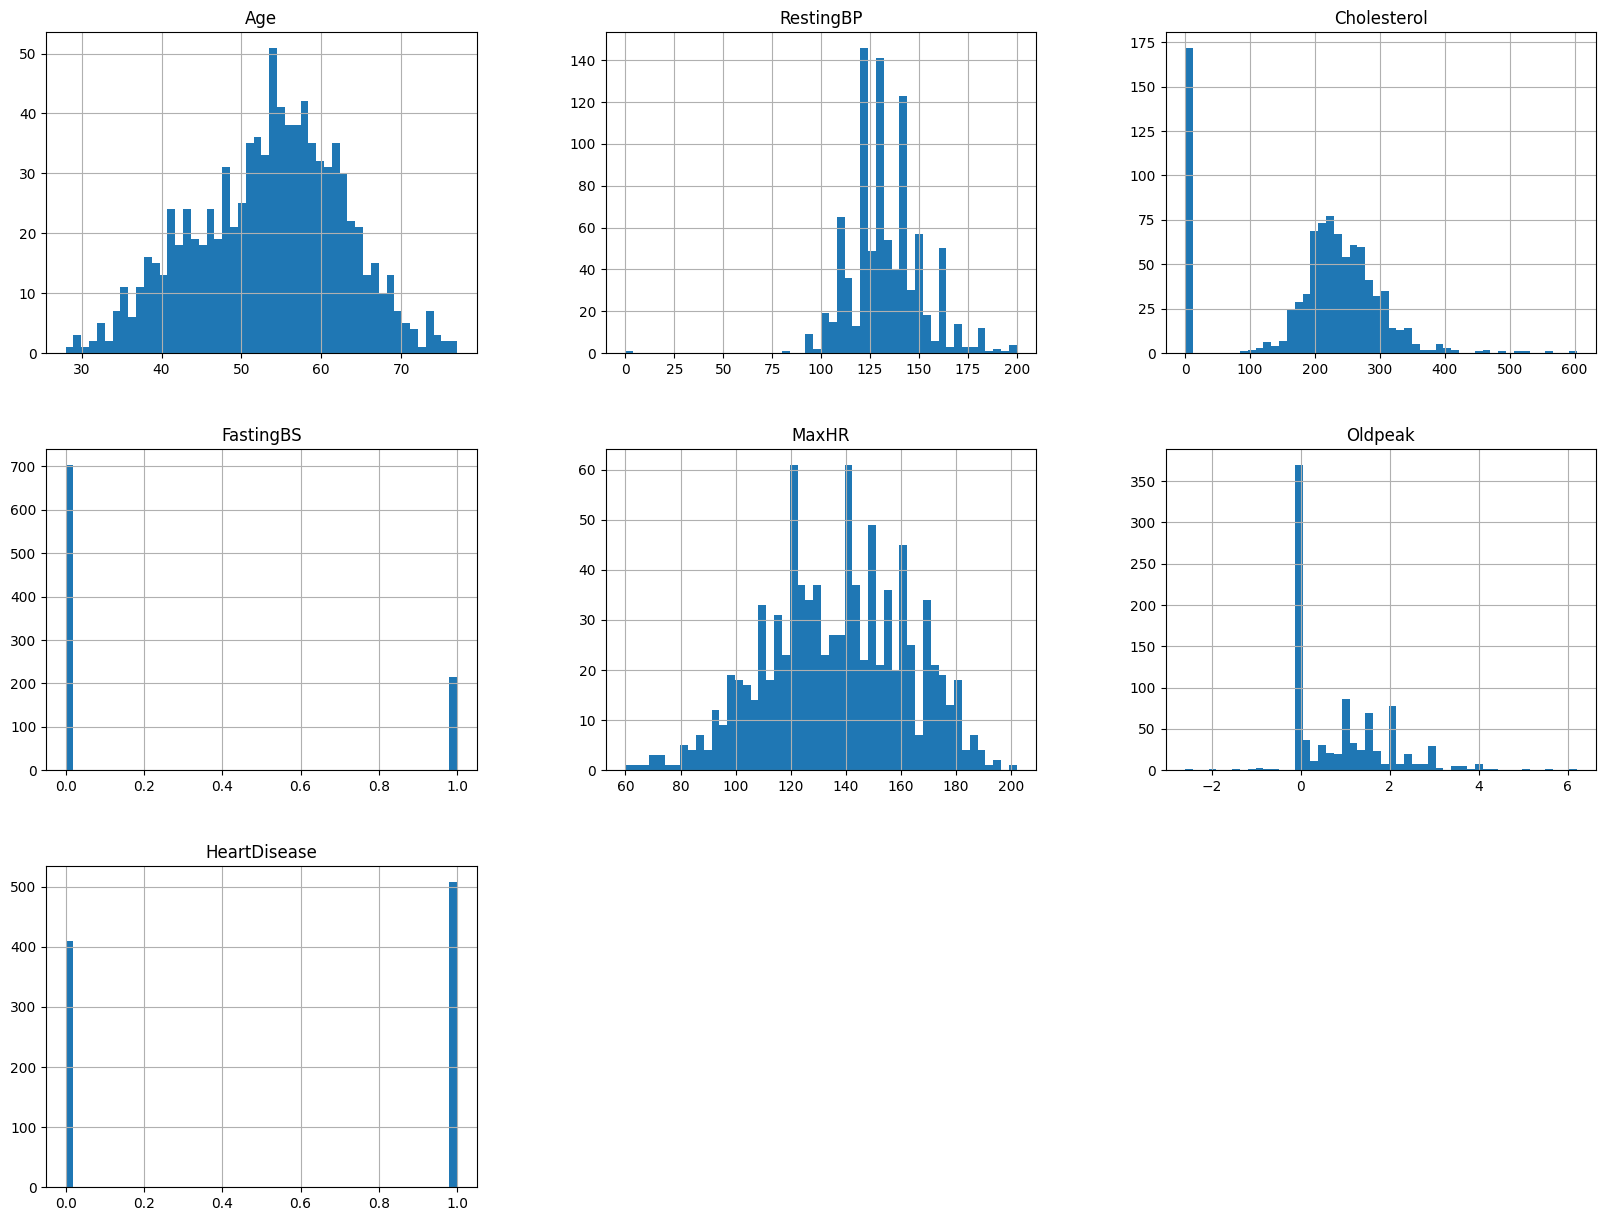

In [12]:
%matplotlib inline 
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

In [17]:
import numpy as np

def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [18]:
train_set, test_set = split_train_test(data, 0.2)
print(len(train_set))
print(len(test_set))

735
183


In [26]:
from zlib import crc32
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

In [23]:
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [27]:
heart_with_id=data.reset_index()
train_set, test_set = split_train_test_by_id(heart_with_id, 0.2, "index")

In [29]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [31]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data["Sex"] = label_encoder.fit_transform(data["Sex"])
data["ChestPainType"] = label_encoder.fit_transform(data["ChestPainType"])
data["RestingECG"] = label_encoder.fit_transform(data["RestingECG"])
data["ExerciseAngina"] = label_encoder.fit_transform(data["ExerciseAngina"])
data["ST_Slope"] = label_encoder.fit_transform(data["ST_Slope"])


In [34]:
print(data.columns)


Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_1', 'ChestPainType_1', 'ChestPainType_2',
       'ChestPainType_3', 'RestingECG_1', 'RestingECG_2', 'ExerciseAngina_1',
       'ST_Slope_1', 'ST_Slope_2'],
      dtype='object')


In [32]:
data = pd.get_dummies(data, columns=["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"], drop_first=True)


In [35]:
# Binning continuous numerical variables
data["Age"] = pd.cut(data["Age"], bins=[20, 30, 40, 50, 60, 70, np.inf], labels=[1, 2, 3, 4, 5, 6])
data["RestingBP"] = pd.cut(data["RestingBP"], bins=[80, 100, 120, 140, 160, np.inf], labels=[1, 2, 3, 4, 5])
data["Cholesterol"] = pd.cut(data["Cholesterol"], bins=[100, 150, 200, 250, 300, np.inf], labels=[1, 2, 3, 4, 5])
data["MaxHR"] = pd.cut(data["MaxHR"], bins=[50, 100, 150, 200, np.inf], labels=[1, 2, 3, 4])
data["Oldpeak"] = pd.cut(data["Oldpeak"], bins=[0, 1, 2, 3, np.inf], labels=[1, 2, 3, 4])

<Axes: >

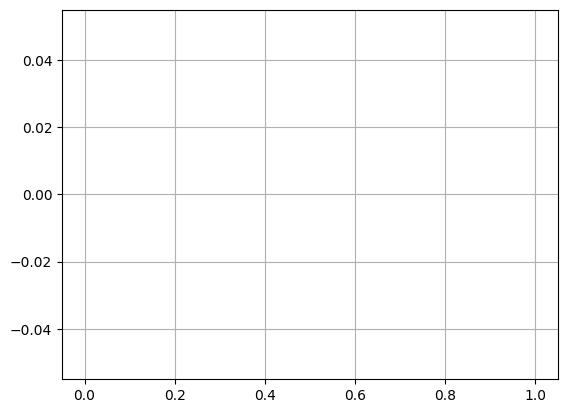

In [36]:
data["Age"].hist()

<Axes: >

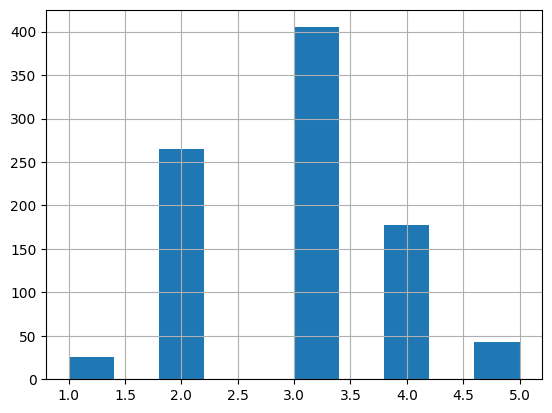

In [37]:
data["RestingBP"].hist()

<Axes: >

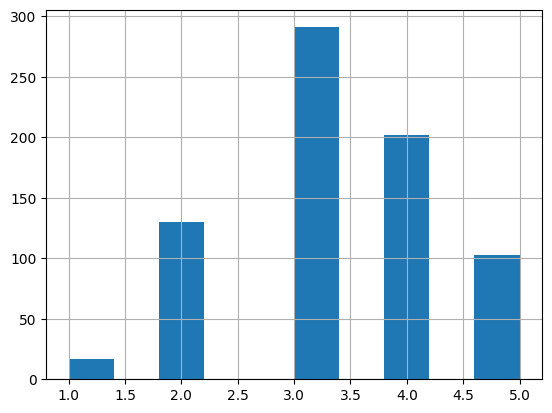

In [38]:
data["Cholesterol"].hist()

<Axes: >

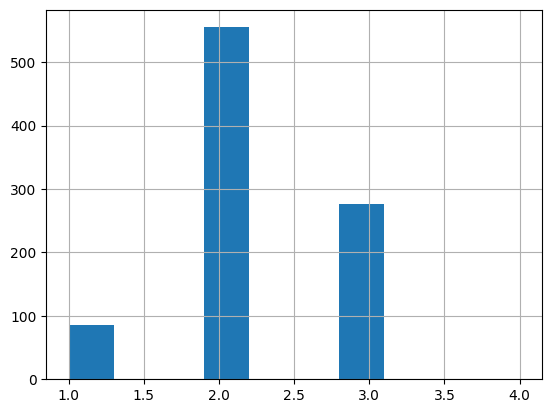

In [39]:
data["MaxHR"].hist()

<Axes: >

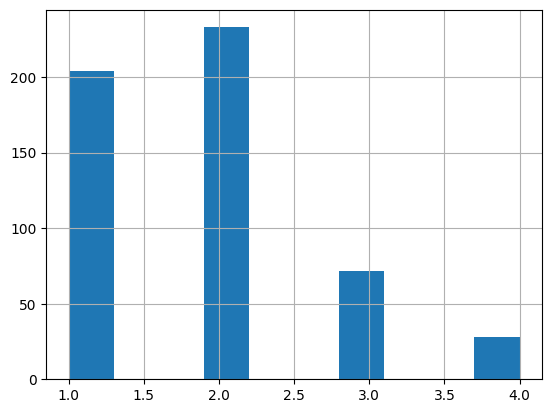

In [40]:
data["Oldpeak"].hist()

In [44]:
 # Create a stratification key using fewer attributes (Age, Sex, ChestPainType)
data['strat_key'] = data[['Age', 'Sex_1', 'ChestPainType_1']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

# Initialize StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Perform the split
for train_index, test_index in split.split(data, data['strat_key']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

# Print the result
print("Stratified training set shape:", strat_train_set.shape)
print("Stratified test set shape:", strat_test_set.shape)


Stratified training set shape: (734, 17)
Stratified test set shape: (184, 17)


In [45]:
# Check the value counts of the stratified key in the test set
strat_test_set['strat_key'].value_counts()

# Calculate the distribution of stratified key categories in the test set as a percentage
strat_test_set['strat_key'].value_counts() / len(strat_test_set)


strat_key
nan_True_False     0.668478
nan_False_False    0.146739
nan_True_True      0.119565
nan_False_True     0.065217
Name: count, dtype: float64

In [46]:
# Drop 'strat_key' once you're done checking
strat_train_set = strat_train_set.drop(columns=['strat_key'])
strat_test_set = strat_test_set.drop(columns=['strat_key'])


In [47]:
data = strat_train_set.copy()

In [48]:
print(data.columns)


Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_1', 'ChestPainType_1', 'ChestPainType_2',
       'ChestPainType_3', 'RestingECG_1', 'RestingECG_2', 'ExerciseAngina_1',
       'ST_Slope_1', 'ST_Slope_2'],
      dtype='object')


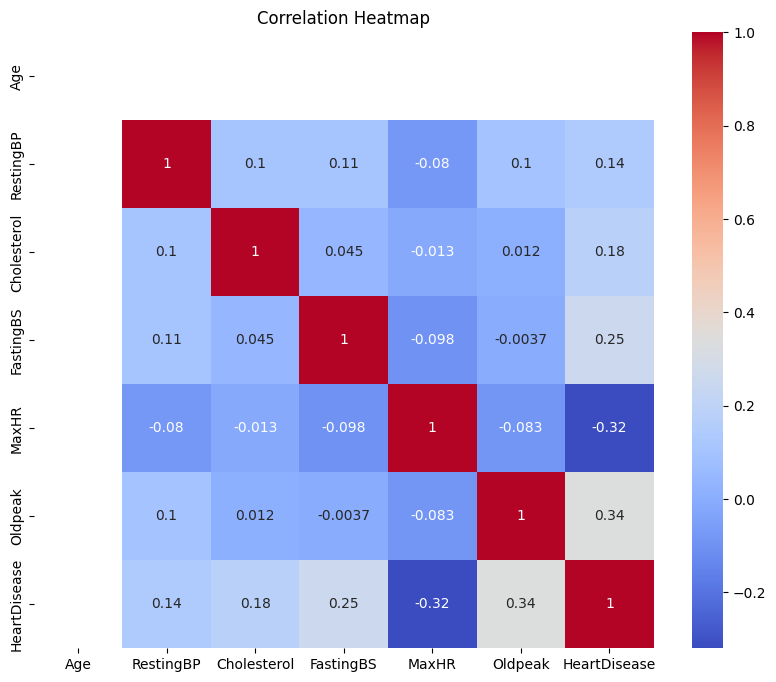

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(data[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Age                 category
RestingBP           category
Cholesterol         category
FastingBS              int64
MaxHR               category
Oldpeak             category
HeartDisease           int64
Sex_1                   bool
ChestPainType_1         bool
ChestPainType_2         bool
ChestPainType_3         bool
RestingECG_1            bool
RestingECG_2            bool
ExerciseAngina_1        bool
ST_Slope_1              bool
ST_Slope_2              bool
dtype: object


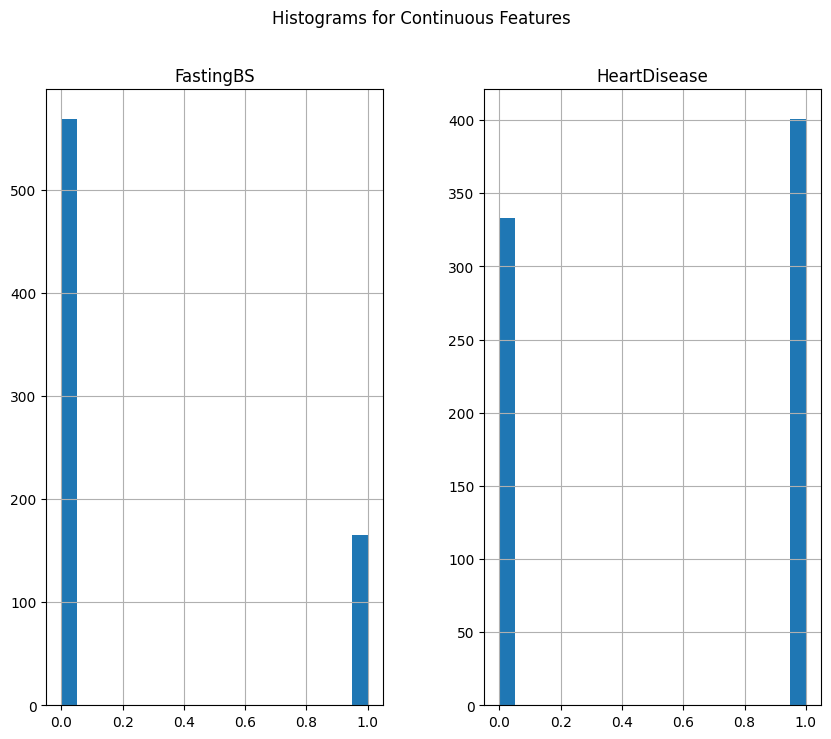

In [51]:
print(data.dtypes)
# Select only numerical columns
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Plot histograms for the numerical columns
numeric_data.hist(figsize=(10, 8), bins=20)
plt.suptitle('Histograms for Continuous Features')
plt.show()


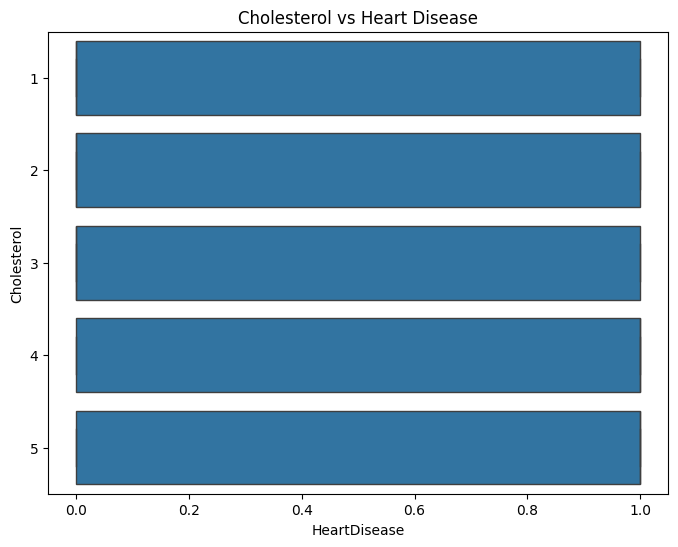

In [52]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='HeartDisease', y='Cholesterol', data=data)
plt.title('Cholesterol vs Heart Disease')
plt.show()


In [60]:
data=load_heart_data()
data.head()


Loading data from: datasets\heart\heart.csv


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


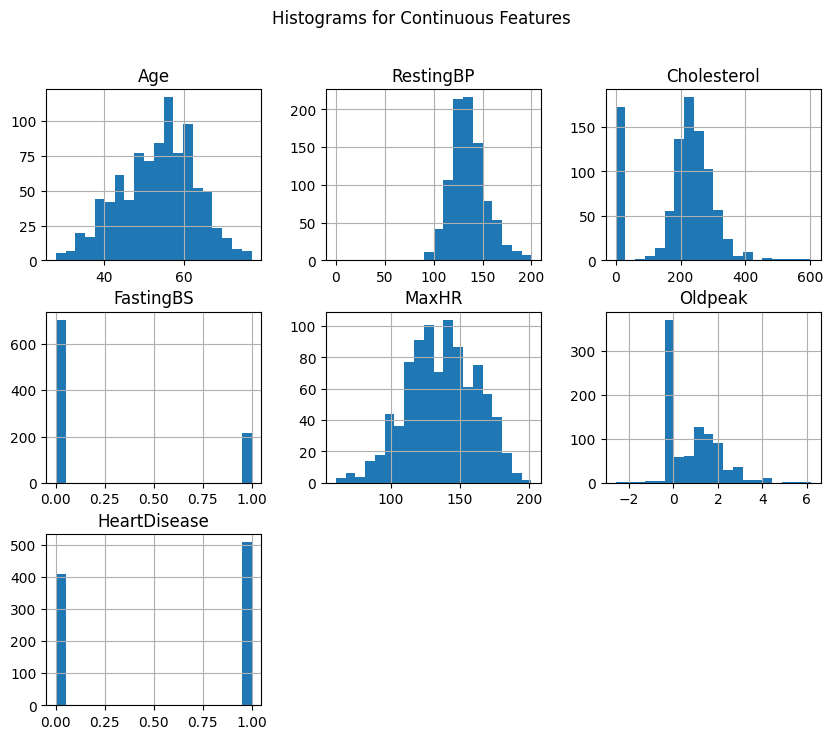

In [61]:
# Select only numerical columns
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Plot histograms for the numerical columns
numeric_data.hist(figsize=(10, 8), bins=20)
plt.suptitle('Histograms for Continuous Features')
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Age           918 non-null    int64
 1   RestingBP     918 non-null    int64
 2   Cholesterol   918 non-null    int64
 3   MaxHR         918 non-null    int64
 4   HeartDisease  918 non-null    int64
dtypes: int64(5)
memory usage: 36.0 KB
None
   Age  RestingBP  Cholesterol  MaxHR  HeartDisease
0   40        140          289    172             0
1   49        160          180    156             1
2   37        130          283     98             0
3   48        138          214    108             1
4   54        150          195    122             0


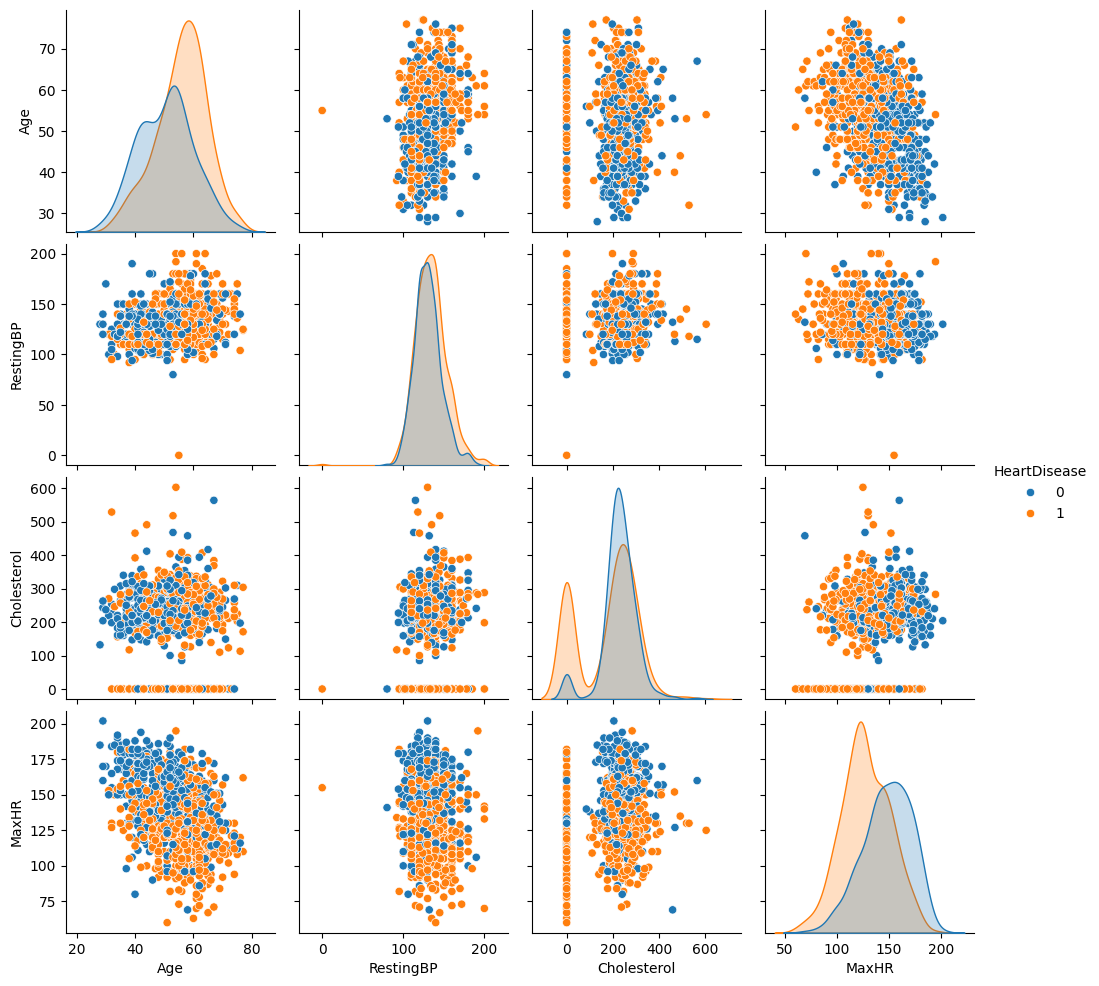

In [76]:
# Select relevant columns
data_clean = data[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'HeartDisease']].dropna()

# Ensure numeric columns
data_clean = data_clean.apply(pd.to_numeric, errors='coerce')

# Drop any remaining NaN values
data_clean = data_clean.dropna()

# Verify the cleaned data
print(data_clean.info())
print(data_clean.head())

# Plot the pair plot
sns.pairplot(data_clean, hue='HeartDisease')
plt.show()


                   Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000  


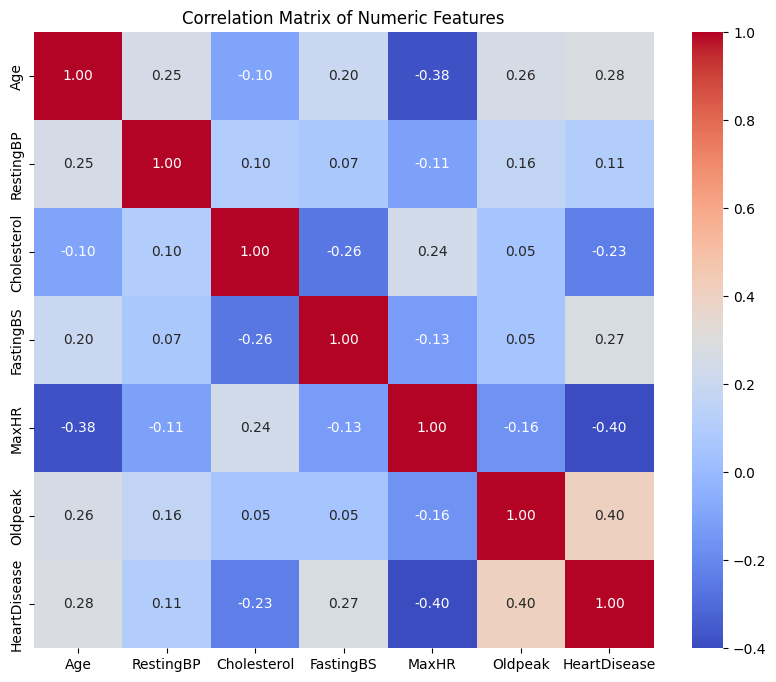

In [77]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Show the correlation matrix
print(corr_matrix)

# Optional: Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


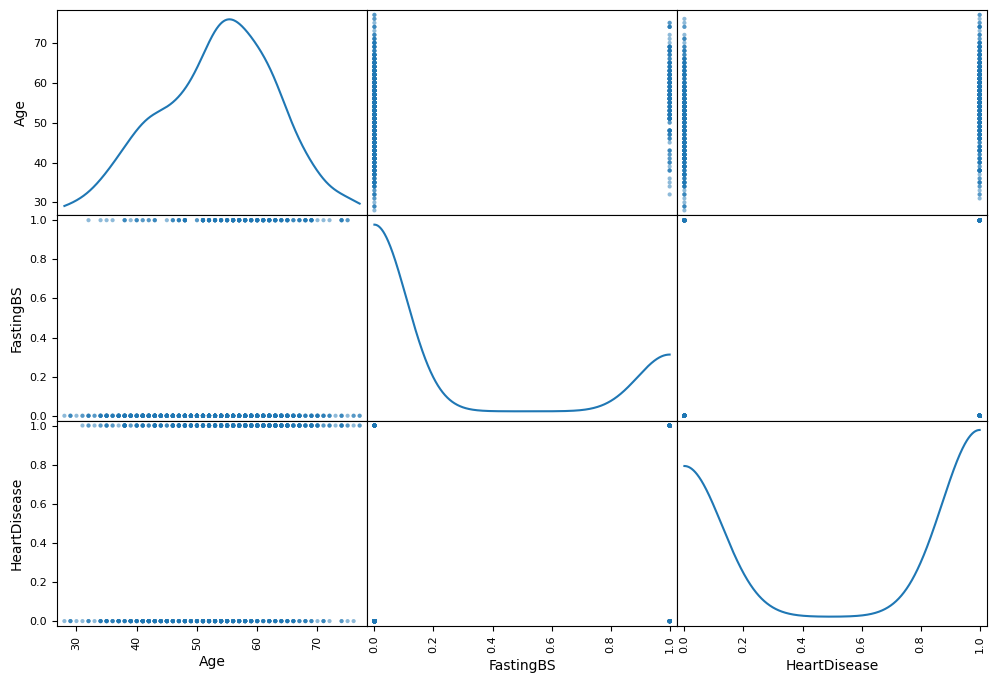

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


attributes = ["Age", "FastingBS", "HeartDisease"]
scatter_matrix(data[attributes], figsize=(12, 8), diagonal='kde')

plt.show()  # This will display the plot


In [68]:
import pandas as pd


# Select numeric attributes for correlation analysis
attributes = ["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak", "HeartDisease"]
corr_matrix = data[attributes].corr()

# Sort the correlations with respect to 'HeartDisease'
sorted_corr = corr_matrix["HeartDisease"].sort_values(ascending=False)

print(sorted_corr)


HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.107589
Cholesterol    -0.232741
MaxHR          -0.400421
Name: HeartDisease, dtype: float64


In [72]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [94]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load your dataset
def load_heart_data():
    return pd.read_csv('datasets/heart/heart.csv')

# Function to split data
def split_train_test(data, test_ratio):
    return train_test_split(data, test_size=test_ratio, random_state=42)

# Main processing
heart_data = load_heart_data()

# Split data
train_set, test_set = split_train_test(heart_data, 0.2)

# Handle NaN values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
numerical_columns = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

# Impute missing values in train_set
train_set[numerical_columns] = imputer.fit_transform(train_set[numerical_columns])

# Impute missing values in test_set
test_set[numerical_columns] = imputer.transform(test_set[numerical_columns])

# Confirm no NaN values remain
print("NaN values in train_set after imputation:\n", train_set.isnull().sum())
print("NaN values in test_set after imputation:\n", test_set.isnull().sum())

# Verify shape
print("Train set shape:", train_set.shape)
print("Test set shape:", test_set.shape)

# Optionally inspect the first few rows of the datasets
print(train_set.head())
print(test_set.head())


NaN values in train_set after imputation:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
NaN values in test_set after imputation:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
Train set shape: (734, 12)
Test set shape: (184, 12)
      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
795  42.0   M           NAP      120.0        240.0          1     Normal   
25   36.0   M           NAP      130.0        209.0          0     Normal   
84   56.0   M           ASY      150.0        213.0          1     Normal   
10   37.0   F           NAP      130.0        21

In [16]:
import os
import pandas as pd
import urllib.request
import joblib
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# URL and path settings
DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/PEDAPATI-SAIVAMSI/END_TO_END_ML_PROJECT_HEART-DISESEAASE_PREDICTION/main/'
HEART_PATH = os.path.join("datasets", "heart")
HEART_URL = DOWNLOAD_ROOT+"heart/heart.csv"  # Updated with your input

# Function to download the heart dataset
def fetch_heart_data(heart_url=HEART_URL, heart_path=HEART_PATH):
    os.makedirs(heart_path, exist_ok=True)
    csv_path = os.path.join(heart_path, "heart.csv")
    print(f"Downloading data from: {heart_url}")
    urllib.request.urlretrieve(heart_url, csv_path)
    print(f"Data downloaded to: {csv_path}")

# Function to load the dataset from a local file
def load_heart_data(heart_path=HEART_PATH):
    csv_path = os.path.join(heart_path, "heart.csv")
    print(f"Loading data from: {csv_path}")
    return pd.read_csv(csv_path)

# Custom Preprocessor Class
class CustomPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        # Numeric pipeline
        self.numeric_pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ])
        
        # Ordinal encoder for specific categorical features
        self.ordinal_encoder = OrdinalEncoder()

        # One-hot encoder for categorical features
        self.onehot_encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')

        # Define columns
        self.numeric_cols = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
        self.ordinal_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
        self.onehot_cols = ['FastingBS']

        # Full pipeline using ColumnTransformer
        self.full_pipeline = ColumnTransformer([
            ("num", self.numeric_pipeline, self.numeric_cols),
            ("ord", self.ordinal_encoder, self.ordinal_cols),
            ("cat", self.onehot_encoder, self.onehot_cols),
        ])

    def fit(self, X, y=None):
        self.full_pipeline.fit(X)
        return self

    def transform(self, X):
        return self.full_pipeline.transform(X)

# Save the model, cross-validation scores, and predictions
def save_model(model, model_name, cv_scores, y_pred):
    model_filename = f"models/{model_name}.pkl"
    joblib.dump({
        'model': model,
        'hyperparameters': model.get_params(),  # Save model hyperparameters
        'cv_scores': cv_scores,                # Save cross-validation scores
        'predictions': y_pred                  # Save the predictions
    }, model_filename)
    print(f"{model_name} saved to {model_filename}")

# Main code
if __name__ == "__main__":
    # Create a directory to store models if it doesn't exist
    if not os.path.exists("models"):
        os.makedirs("models")

    # Fetch and load data
    fetch_heart_data()  # Download the dataset
    heart_data = load_heart_data()  # Load the dataset

    # Split the data into train and test sets
    train_set, test_set = train_test_split(heart_data, test_size=0.2, random_state=42)

    # Preprocess the data
    preprocessor = CustomPreprocessor()
    preprocessor.fit(train_set)
    X_train = preprocessor.transform(train_set)
    y_train = train_set['HeartDisease']
    X_test = preprocessor.transform(test_set)
    y_test = test_set['HeartDisease']

    # Define top 10 models
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Support Vector Machine": SVC(),
        "Naive Bayes": GaussianNB(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "AdaBoost": AdaBoostClassifier(algorithm='SAMME'),  # Specify the SAMME algorithm
        "Ridge Classifier": RidgeClassifier(),
        "Extra Trees": ExtraTreesClassifier(),
    }

    # Define number of folds
    n_folds = 10

    # Train and evaluate each model using K-fold cross-validation
    cv_results = {}

    for model_name, model in models.items():
        # Perform cross-validation
        scores = cross_val_score(model, X_train, y_train, cv=n_folds, scoring='accuracy')
        cv_results[model_name] = scores
        print(f"{model_name} Cross-Validated Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

        # Fit the model on the full training data
        model.fit(X_train, y_train)
        
        # Make predictions on the test data
        y_pred = model.predict(X_test)
        
        # Save the model, scores, and predictions
        save_model(model, model_name, scores, y_pred)

    # Optionally, sort and display the results
    sorted_cv_results = sorted(cv_results.items(), key=lambda x: x[1].mean(), reverse=True)
    print("\nTop Models by Cross-Validated Accuracy:")
    for name, scores in sorted_cv_results:
        print(f"{name}: {scores.mean():.4f} ± {scores.std():.4f}")


Data downloaded to: datasets\heart\heart.csv
Loading data from: datasets\heart\heart.csv
Logistic Regression Cross-Validated Accuracy: 0.8541 ± 0.0362
Logistic Regression saved to models/Logistic Regression.pkl
K-Nearest Neighbors Cross-Validated Accuracy: 0.8392 ± 0.0498
K-Nearest Neighbors saved to models/K-Nearest Neighbors.pkl
Decision Tree Cross-Validated Accuracy: 0.7861 ± 0.0255
Decision Tree saved to models/Decision Tree.pkl
Random Forest Cross-Validated Accuracy: 0.8690 ± 0.0393
Random Forest saved to models/Random Forest.pkl
Support Vector Machine Cross-Validated Accuracy: 0.8609 ± 0.0376
Support Vector Machine saved to models/Support Vector Machine.pkl
Naive Bayes Cross-Validated Accuracy: 0.8609 ± 0.0430
Naive Bayes saved to models/Naive Bayes.pkl
Gradient Boosting Cross-Validated Accuracy: 0.8595 ± 0.0406
Gradient Boosting saved to models/Gradient Boosting.pkl
AdaBoost Cross-Validated Accuracy: 0.8596 ± 0.0334
AdaBoost saved to models/AdaBoost.pkl
Ridge Classifier Cross-Va

In [17]:
from sklearn.model_selection import cross_val_score

# Define number of folds
n_folds = 10

# Train and evaluate each model using K-fold cross-validation
cv_results = {}

for model_name, model in models.items():
    # Perform cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=n_folds, scoring='accuracy')
    cv_results[model_name] = scores
    print(f"{model_name} Cross-Validated Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

# Optionally, sort and display the results
sorted_cv_results = sorted(cv_results.items(), key=lambda x: x[1].mean(), reverse=True)
print("\nTop Models by Cross-Validated Accuracy:")
for name, scores in sorted_cv_results:
    print(f"{name}: {scores.mean():.4f} ± {scores.std():.4f}")


Logistic Regression Cross-Validated Accuracy: 0.8541 ± 0.0362
K-Nearest Neighbors Cross-Validated Accuracy: 0.8392 ± 0.0498
Decision Tree Cross-Validated Accuracy: 0.7820 ± 0.0309
Random Forest Cross-Validated Accuracy: 0.8705 ± 0.0299
Support Vector Machine Cross-Validated Accuracy: 0.8609 ± 0.0376
Naive Bayes Cross-Validated Accuracy: 0.8609 ± 0.0430
Gradient Boosting Cross-Validated Accuracy: 0.8609 ± 0.0376
AdaBoost Cross-Validated Accuracy: 0.8596 ± 0.0334
Ridge Classifier Cross-Validated Accuracy: 0.8459 ± 0.0381
Extra Trees Cross-Validated Accuracy: 0.8705 ± 0.0233

Top Models by Cross-Validated Accuracy:
Extra Trees: 0.8705 ± 0.0233
Random Forest: 0.8705 ± 0.0299
Gradient Boosting: 0.8609 ± 0.0376
Support Vector Machine: 0.8609 ± 0.0376
Naive Bayes: 0.8609 ± 0.0430
AdaBoost: 0.8596 ± 0.0334
Logistic Regression: 0.8541 ± 0.0362
Ridge Classifier: 0.8459 ± 0.0381
K-Nearest Neighbors: 0.8392 ± 0.0498
Decision Tree: 0.7820 ± 0.0309


In [20]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import pandas as pd

# Load the dataset
fetch_heart_data()  # Download the dataset
heart_data = load_heart_data()

# Separate features and target
X = heart_data.drop('HeartDisease', axis=1)  # Features (drop target column)
y = heart_data['HeartDisease']  # Target labels

# Define categorical and numerical columns
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

# Preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Define the parameter grid for RandomForestClassifier
param_grid = [
    {'classifier__n_estimators': [50, 100, 200], 'classifier__max_features': [2, 4, 6, 8]},
    {'classifier__bootstrap': [False], 'classifier__n_estimators': [50, 100], 'classifier__max_features': [2, 3, 4]}
]

# Create a pipeline that first applies the preprocessor, then fits the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])

# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', return_train_score=True)


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)


Data downloaded to: datasets\heart\heart.csv
Loading data from: datasets\heart\heart.csv
Best Parameters: {'classifier__max_features': 8, 'classifier__n_estimators': 100}
Best Cross-Validated Accuracy: 0.873283011834871
Test Set Accuracy: 0.8804347826086957


In [22]:
import numpy as np
import pandas as pd
from scipy import stats

# Assuming your best model is already obtained
best_model = grid_search.best_estimator_

# Transform the test set
X_test_transformed = best_model.named_steps['preprocessor'].transform(X_test)

# Make predictions using the full pipeline
y_pred = best_model.predict(X_test)

# Calculate the accuracy
accuracy = np.mean(y_pred == y_test)
print("Test Set Accuracy:", accuracy)

# Compute the 95% confidence interval for the accuracy
n = len(y_test)
p = accuracy
se = np.sqrt(p * (1 - p) / n)

# Confidence interval
confidence_interval = stats.t.interval(0.95, n - 1, loc=p, scale=se)
print("95% Confidence Interval for the Accuracy:", confidence_interval)



Test Set Accuracy: 0.8804347826086957
95% Confidence Interval for the Accuracy: (0.8332424090221506, 0.9276271561952407)
